<a href="https://colab.research.google.com/github/DaryaTereshchenko/ExperimentsUkr/blob/main/MultinomialNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np

In [ ]:
def plot(y_true, y_pred, labels=None, title="", cmap=plt.cm.Blues):
    con_mat_df = confusion_matrix(y_true, y_pred)
    con_mat_df = con_mat_df.astype('float') / con_mat_df.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=con_mat_df, display_labels=labels)
    disp.plot(cmap=cmap)
    plt.title(title)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AnnotatedFull.csv")


Models Multinomial

In [ ]:
X = df.tweet
y = df.label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=42, 
                                   test_size=0.3, 
                                   shuffle=True)

In [ ]:
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model2 = make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
model1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)

model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)

Evaluation

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred_m3))
print('F1 score:', f1_score(y_test, y_pred_m3, average="macro"))
print(classification_report(y_test, y_pred_m3))

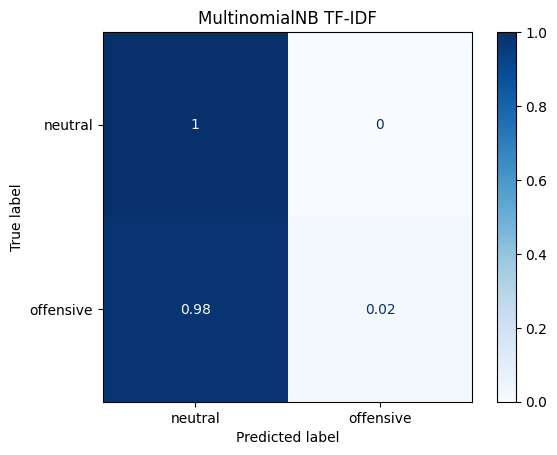

In [ ]:
plot(y_test, y_pred_model1, labels=["neutral", "offensive"], title="MultinomialNB TF-IDF")